# Projeto: Segmentação de clientes para definição de estratégia de marketing

##Neste projeto vamos usar os algoritmos de aprendizado de máquina K-means, PCA e AutoEncoders para segmentar clientes de acordo com gastos com cartão de crédito

<img src="Clientes (4).jpg" align="left">
<img src="divisão de clientes (8).jpg" alig="right">


- Marketing é crucial para o crescimento de qualquer negócio. 
- Profissionais de marketing ajudam a construir a marca da empresa, fidelizar consumidores, aumentar o lucro e as vendas. 
- Um dos pontos chaves para esses profissionais é conhecer seus clientes e identificar suas necessidades.
- Entendendo seus consumidores, podem lançar companhas direcionadas, específicas para a necessidade de cada pessoa.
- E havendo dados sobre esses consumidores, a ciência de dados pode ser usada para segmentar esses clientes.
- Por meio da segmentação de clientes a empresa é capaz de testar diferentes ações de marketing para cada grupo de clientes com perfis semelhantes. A ideia é facilitar a atuação dos times de marketing e vendas ao longo de toda a jornada do cliente junto à empresa.




# Problema de Negócio


<img src="banco.jpg" align="center">


- No nosso caso de estudo, você foi contratado como consultor para um banco americano.
- Esse banco tem dados sobre o comportamento, gastos e hábitos de consumo de mais de 9000 clientes, registrados durante seis meses.
- O time de Marketing do banco querem lançar uma campanha com anúncios direcionandos, divindo seus clientes em pelo menos tres grupos com características distintas.
 - A base de dados usada será a Credit Card Dastasest for Clustering, disponível no site*: https://www.kaggle.com/arjunbhasin2013/ccdata



## Vamos analisar o que significa cada uma das variáveis da nossa base de dados:

- **`CUSTID`** : dentificação do titular do cartão de crédito
- **`BALANCE`** : Saldo restante na conta para fazer compras
- **`BALANCEFREQUENCY`** : com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
- **`PURCHASES`** : Valor das compras realizadas;
- **`ONEOFFPURCHASES`** : Valor máximo da compra realizada de uma só vez
- **`INSTALLMENTSPURCHASES`** : Valor da compra parcelada
- **`CASHADVANCE`** : Valor antecipado dado pelo usuário
- **`PURCHASESFREQUENCY`** : Frequência com que as compras estão sendo feitas, pontuação entre 0 e 1 (1 = frequentemente comprado, 0 = não frequentemente comprado)
- **`ONEOFFPURCHASESFREQUENCY`**: Com que frequência as compras acontecem de uma vez (1 = frequentemente comprado, 0 = não frequentemente comprado)

- **`PURCHASESINSTALLMENTSFREQUENCY`** : Frequência com que as compras a prazo estão sendo feitas (1 = frequentemente, 0 = não frequentemente)
- **`CASHADVANCEFREQUENCY`** : Frequência com que o dinheiro antecipado está sendo pago
- **`CASHADVANCETRX`** : úmero de transações feitas com “Dinheiro adiantado”
- **`PURCHASESTRX`** : Número de transações de compras feitas 
- **`CREDITLIMIT`** : Limite do cartão de crédito 
- **`PAYMENTS`** : Valor do pagamento feito pelo usuário
- **`MINIMUM_PAYMENTS`** : Valor mínimo dos pagamentos feitos pelo usuário
- **`PRCFULLPAYMENT`** : Porcentagem do pagamento total pago pelo usuário
- **`TENURE`** : Há quanto tempo o usuário tem o cartão de crédito


# Explorando os Dados

Vamos começar importando as bibliotecas do python que serão usadas, e analisando o Dataset

In [1]:
# Importando as bibliotecas que serão usadas
import pandas as pd
import numpy as np

# As bibliotecas gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# E as bibliotecas de algoritmos de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Estilo de gráfico usando nas plotagens
import matplotlib.style as style
style.use('bmh')

In [2]:
# Carregando o Dataset 'credito'

creditcard_df = pd.read_csv('credito.csv')

In [3]:
# Vamos visualizar as primeiras cinco linhas do DataFrame
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Checando o nome e Dtype de cada coluna (Feature)
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Esse dataset é composto por 18 variáveis e 8950 entradas. Com exceção do ID do cliente, o restante das variáveis são todas numéricas.

In [72]:
# Descrição estatística das colunas numéricas (valor mínimo e máximo, desvio padrão e média)
# Serão usados principalmente para detecção de outliers que possam desbalancear os algoritmos de machine learning

creditcard_df.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
BALANCE,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [6]:
# Checando se há valores nulos nas colunas ou se existem linhas repetidas

print(f'No Dataframe há {creditcard_df.duplicated().sum()} linhas repetidas')
print(f'No Dataframe há {creditcard_df.isnull().sum().sum()} valores nulos')

No Dataframe há 0 linhas repetidas
No Dataframe há 314 valores nulos


In [7]:
# Vamos checar em quais colunas estão os valores nulos
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# Checando qual a média dos valores da coluna 'MINIMUM_PAYMENTS'
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [9]:
# Preenchemos os valores nulos da coluna 'MINIMUM_PAYMENTS' com a média da coluna
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [10]:
# Vamos fazer o mesmo com o único valor ausente da coluna 'CREDIT_LIMIT'
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [11]:
# Substituímos o valor ausente pela média dos valores da coluna
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [12]:
# Checando se ainda há algum valor nulo
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Antes de plotarmos alguns gráficos, vamos retirar a coluna 'CUST_ID' que é apenas o ID único de cada cliente
# E a coluna 'TENURE' que indica há quanto tempo o cliente tem o cartão de crédito

creditcard_df.drop(['CUST_ID', 'TENURE'], axis = 1, inplace = True)

# Visualização dos dados

## Plotaremos alguns gráficos para tirarmos alguns insights do nosso Dataframe

In [14]:
# Quais são as colunas do nosso dataframe
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

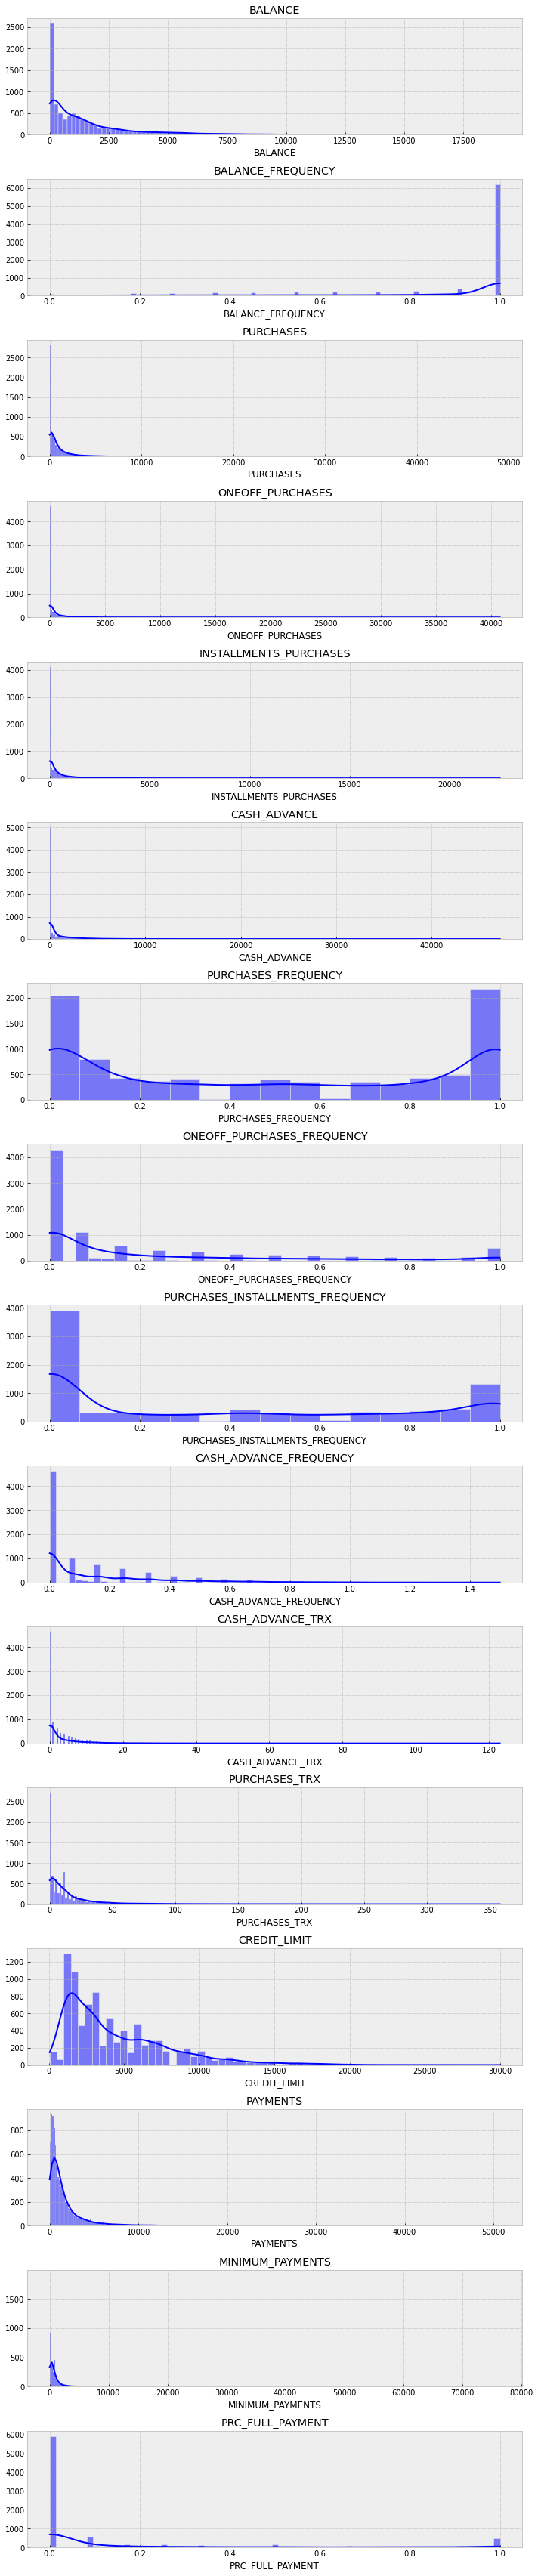

In [15]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.histplot(x=creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
  plt.ylabel('')
plt.tight_layout();

Alguns insights que podemos tirar na análise exploratória:

- A média do saldo em conta (balance) é de 1500 dólares

- 'Balance_Frequency' para a maioria dos clientes é atualizada frequentemente (valor próximo a 1) 

- Para a frequencia de compras (purchase_frequency), existem dois grupos distintos de clientes. 

- Quanto ao 'ONEOFF_PURCHASES_FREQUENCY' e 'PURCHASES_INSTALLMENT_FREQUENCY', a maioria dos clientes não fazem com frequência
- Um número muito pequeno de clientes paga o valor total da conta do cartão de crédito total (PRC_FULL_PAYMENT próximo de 0)
- O crédito limite médio é cerca de 4500 dólares, o valor mínimo é 50 dólares e o maior valor é 30 mil dólares

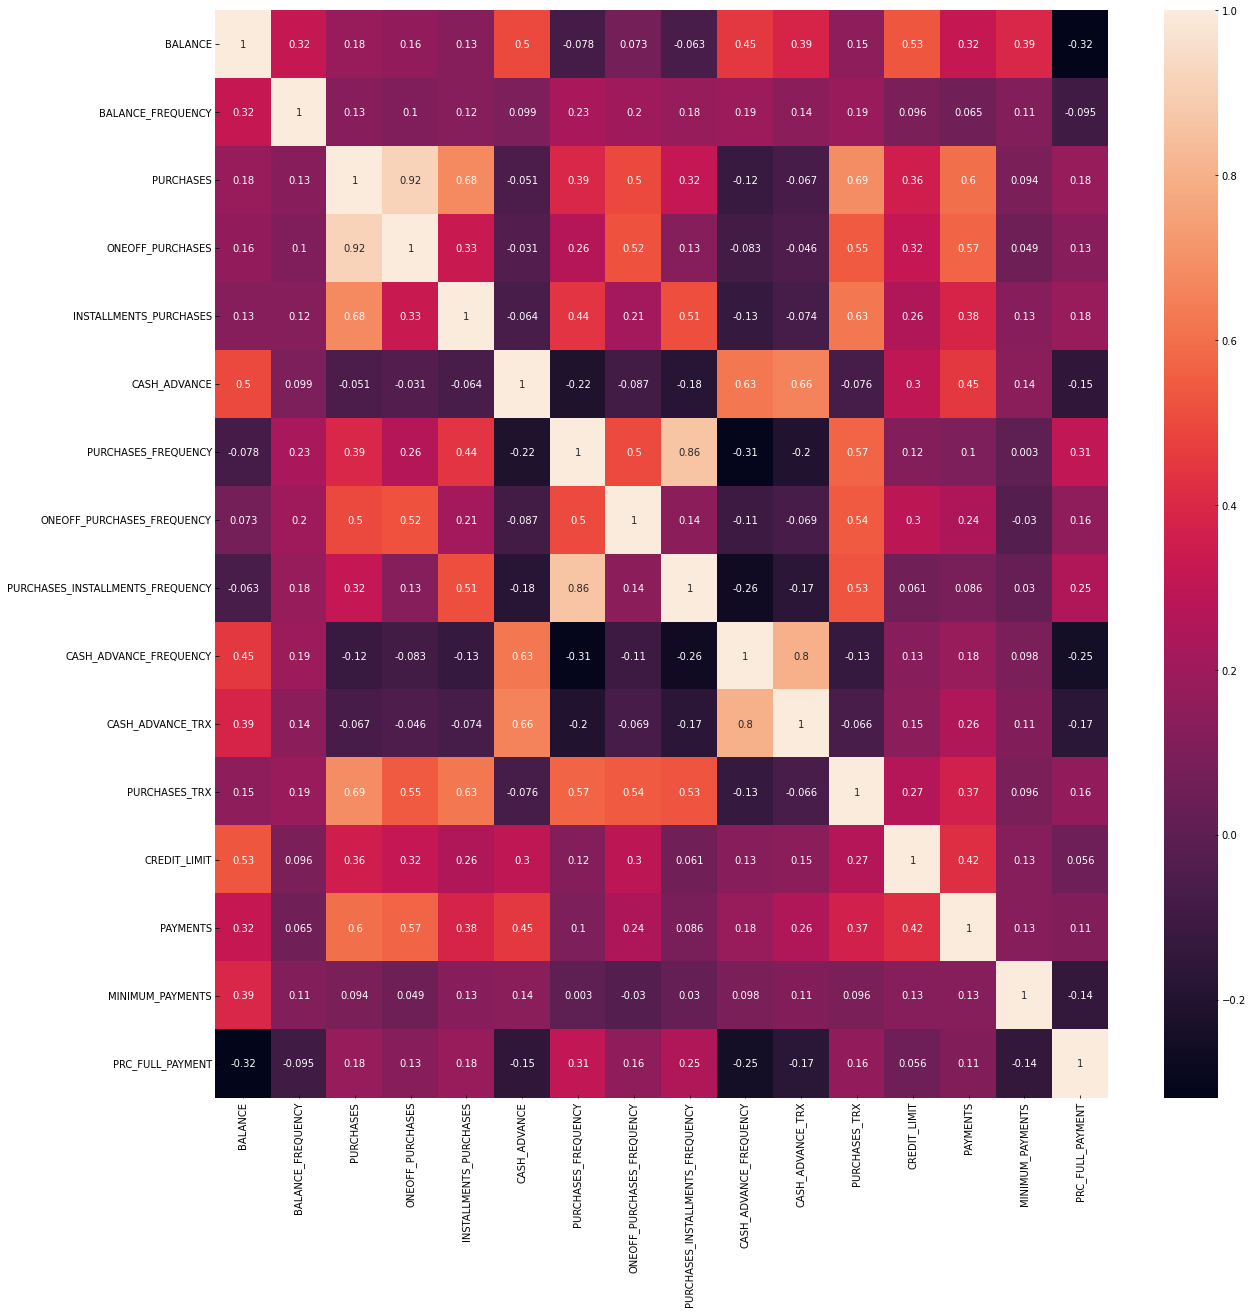

In [69]:
# Analisando o grau de correlação entre as variáveis
correlacao = creditcard_df.corr()

# Para facilitar a visualização dos graus de correlação, criaremos um mapa de calor 
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True);

# Modelo K-means para segmentação do dataframe

In [16]:
# Antes de aplicar algoritmos de ML, precisamos normalizar as nossas features, ou seja, fazer com que os valores fiquem na mesma escala 
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [17]:
# Criamos um novo dataframe já com as colunas normalizadas
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [19]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52897879,
        -0.31096755, -0.52555097],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.81864213,
         0.08931021,  0.2342269 ],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.38380474,
        -0.10166318, -0.52555097],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.5706145 ,
        -0.33546549,  0.32919999],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.58053567,
        -0.34690648,  0.32919999],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.57686873,
        -0.33294642, -0.52555097]])

## Definindo o número de clusters que será divido o dataset

- E antes de aplicar o Kmeans, precisamos definir o número de clusters ou grupos, que iremos dividir o dataset
- Para isso, podemos usar o **método do cotovelo**
- Esse método roda o KMeans para quantidades diferentes de clusters e diz qual dessas quantidades é o número ótimo de clusters.
- O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando.
- Assim, é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

In [20]:
# Iremos criar uma função que retorne uma lista com o valor do wcss/inertia (média das distâncias de cada ponto em relação ao centro do cluster)
# Para cada quantidade de clusters (1 a 10)
# Quanto menor o wcss/inertia, melhor

def calcular_wcss():
  wcss_1 = []
  range_values = range(1, 17)
  for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)
  return wcss_1

In [21]:
wcss_1 = calcular_wcss()

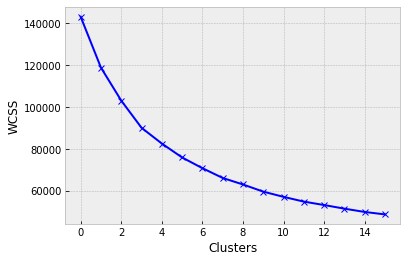

In [22]:
# Vamos plotar um gráfico com a relação entre os valores do WCSS e o número de cluster

plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

- Em conjunto com o método do cotovelo, vamos usar o **método da silhueta** para definir o número ideal de clusters.
- Esse método calcula a distância média entre uma amostra e o cluster mais próximo do qual a amostra não faz parte.
- O melhor valor é 1 e o pior valor é -1. Valores próximos a 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é “mais semelhante”.

In [23]:
# Importando o método da silhueta

from sklearn.metrics import silhouette_score
  
  
no_of_clusters = [3, 4, 5, 6, 7, 8]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(creditcard_df_scaled)
  
    # O silhouette_score dá a média dos valores de toda a amostra.
    silhouette_avg = silhouette_score(creditcard_df_scaled, cluster_labels)
  
    print("Para o número de clusters =", n_clusters,
          " The média do silhouette_score é:", silhouette_avg)

Para o número de clusters = 3  The média do silhouette_score é: 0.2672161762428284
Para o número de clusters = 4  The média do silhouette_score é: 0.21672750730006185
Para o número de clusters = 5  The média do silhouette_score é: 0.2123969779584516
Para o número de clusters = 6  The média do silhouette_score é: 0.22411953945052118
Para o número de clusters = 7  The média do silhouette_score é: 0.23132314411735141
Para o número de clusters = 8  The média do silhouette_score é: 0.2365771906765362


O número ideal k de divisões do dataset é 3 clusters, pois foi o que teve o maior valor (0.26) Agora já podem criar o modelo K-means

## Agrupamento com k-means

In [24]:
# Instanciando o modelo com o número de clusters igual a 3
# e treinando o com o nosso dataset normalizado

kmeans = KMeans(n_clusters=3)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [25]:
# As labels (0, 1, 2) indicam qual dos três cluster cada registro do dataset pertence

pd.Series(labels).value_counts()

2    6122
0    1602
1    1226
dtype: int64

In [26]:
# o centro do cluster, ou centróide, é o 'endereço' definido por um valor de cada variável 
kmeans.cluster_centers_

array([[ 1.16911324,  0.34490892, -0.28778581, -0.20688683, -0.30044877,
         1.3747282 , -0.63649948, -0.30533112, -0.54752856,  1.55168924,
         1.33382702, -0.36127522,  0.60576613,  0.44302355,  0.39990619,
        -0.41235776],
       [ 0.3119875 ,  0.43784419,  1.53876567,  1.28980671,  1.26836997,
        -0.24951658,  1.1439211 ,  1.56748183,  0.96010121, -0.36125176,
        -0.25166053,  1.69038695,  0.88863674,  0.84096426,  0.15524733,
         0.49894844],
       [-0.36855165, -0.17792358, -0.23254938, -0.20391598, -0.17512804,
        -0.31003455, -0.0622337 , -0.23370132, -0.04874807, -0.33401249,
        -0.29889588, -0.24364584, -0.33642978, -0.28427768, -0.13577713,
         0.00813421]])

In [27]:
# Vamos transfomar esses 'endereços' do centro do cluster em um dataframe.
# Os valores estão normalizados, eis que usamos o dataframe foi normalizado anteriormente no algoritmo K-means

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,1.169113,0.344909,-0.287786,-0.206887,-0.300449,1.374728,-0.636499,-0.305331,-0.547529,1.551689,1.333827,-0.361275,0.605766,0.443024,0.399906,-0.412358
1,0.311988,0.437844,1.538766,1.289807,1.268370,-0.249517,1.143921,1.567482,0.960101,-0.361252,-0.251661,1.690387,0.888637,0.840964,0.155247,0.498948
2,-0.368552,-0.177924,-0.232549,-0.203916,-0.175128,-0.310035,-0.062234,-0.233701,-0.048748,-0.334012,-0.298896,-0.243646,-0.336430,-0.284278,-0.135777,0.008134


In [28]:
# Vamos agora aplicar um método que reverte a normalização das variáveis. 
# Assim temos novamente seus valores reais (mas ainda o dataframe dos 'endereços' do centro de cada cluster)

cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,3997.885350,0.958976,388.346007,249.047604,139.375552,3861.740357,0.234893,0.111371,0.146835,0.445653,12.351216,5.729881,6698.474451,3015.653609,1796.171044,0.033107
1,2213.850484,0.980992,4290.801412,2733.252335,1558.038873,455.623197,0.949461,0.670068,0.746006,0.062854,1.531429,56.726531,7727.673469,4167.652996,1226.003908,0.299649
2,797.365673,0.835122,506.359503,253.978610,252.701534,328.714186,0.465373,0.132740,0.345064,0.068305,1.209082,8.653708,3270.380274,910.187818,547.783663,0.156094


- Já poderíamos tirar algumas conclusões desse dataframe com as médias de cada valor do centro dos clusters. 
- Porém, vamos melhorar primeiro o nosso algoritmo, assim poderemos tirar insights mais apurados

In [29]:
# Vamos adicionar uma coluna chamada 'cluster' no dataframe creditcard_df
# Indicando o grupo a que pertence cada cliente

creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2


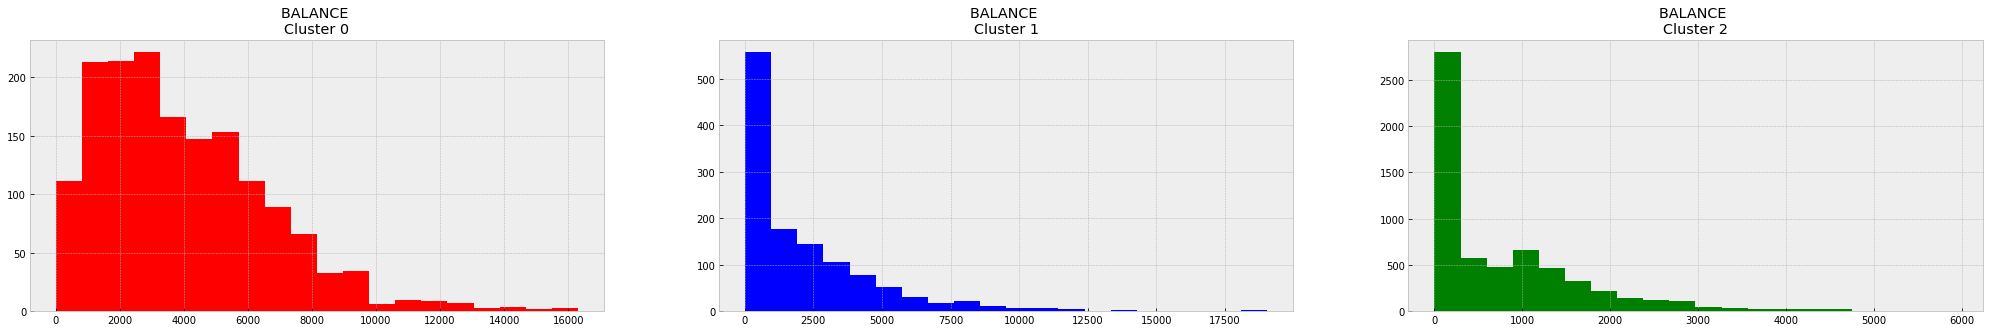

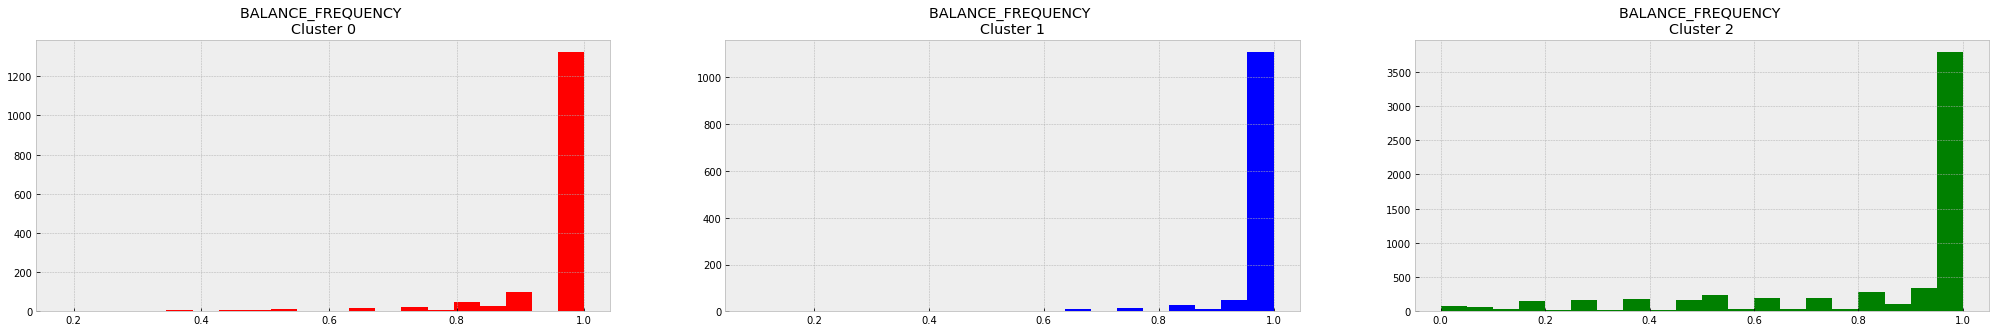

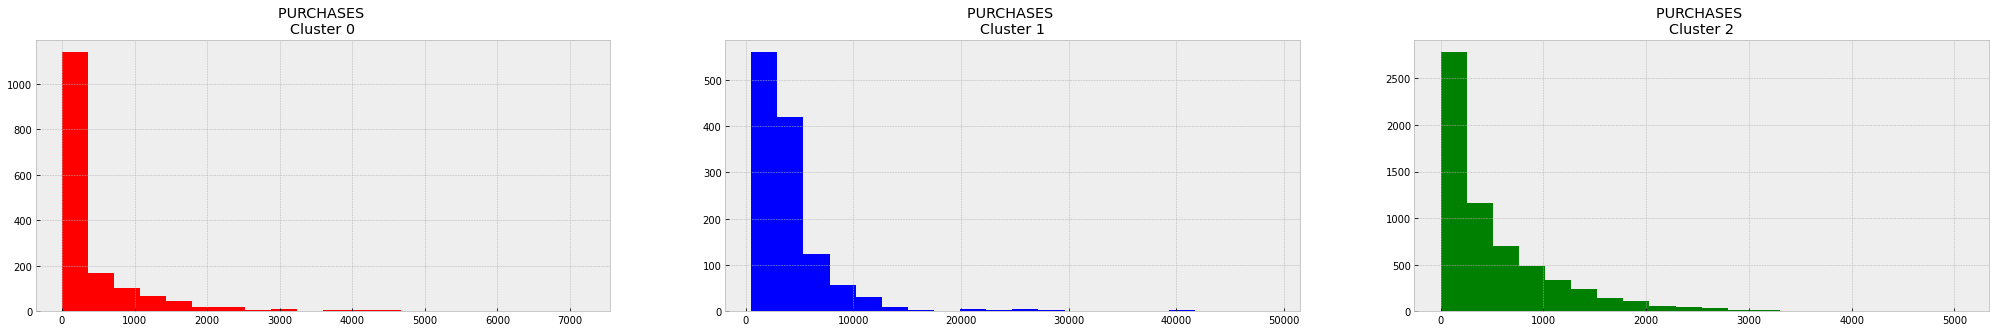

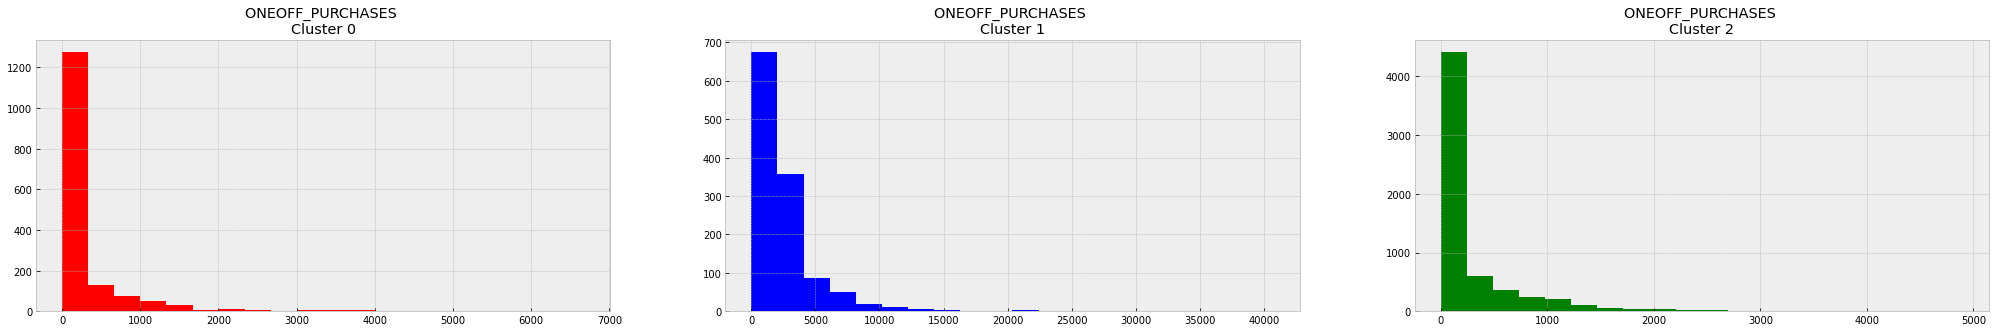

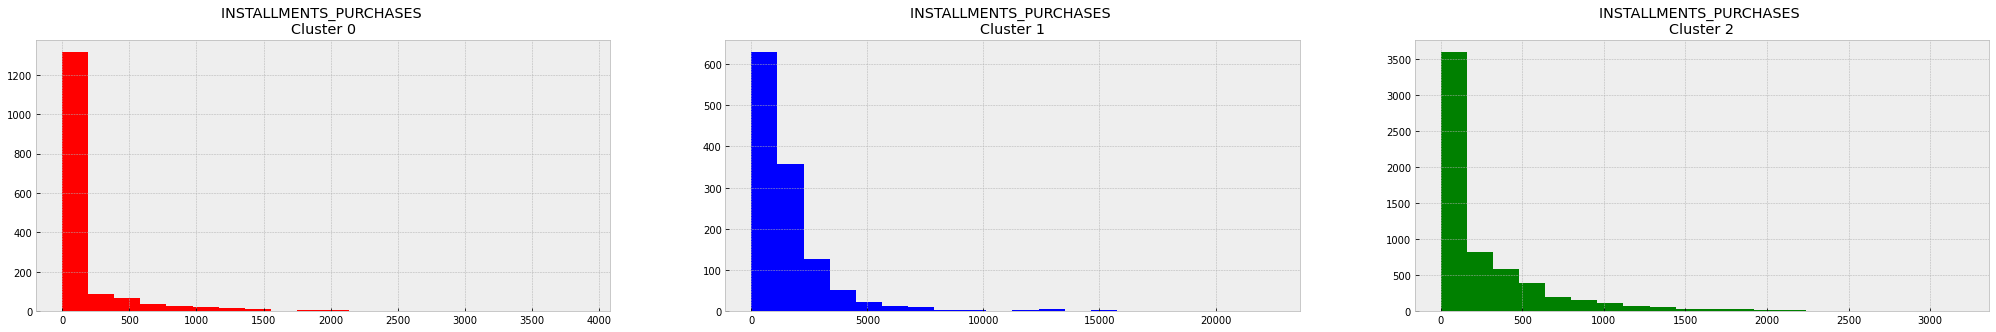

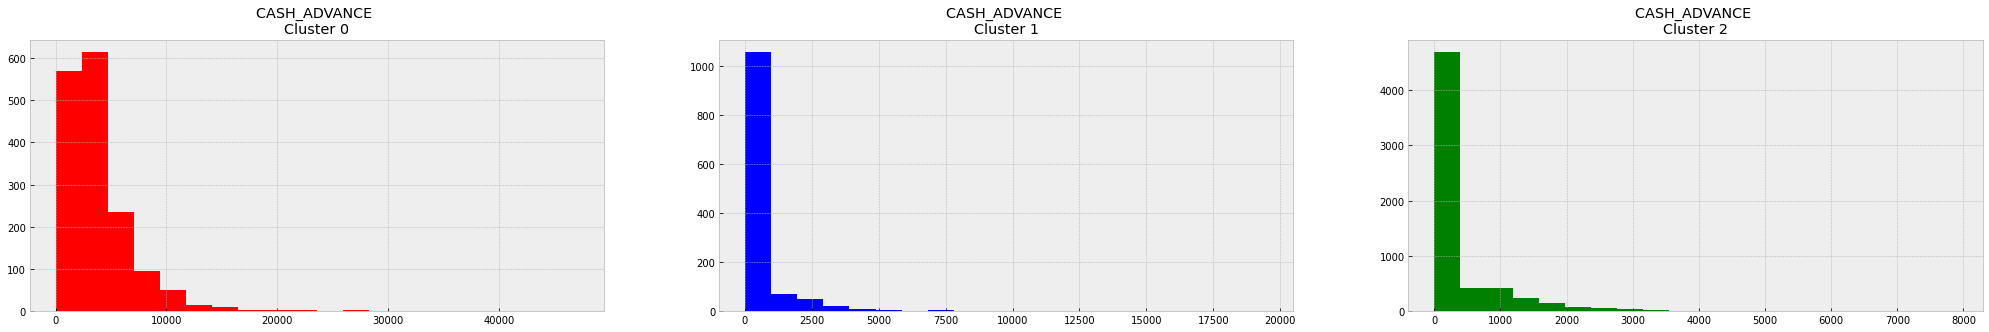

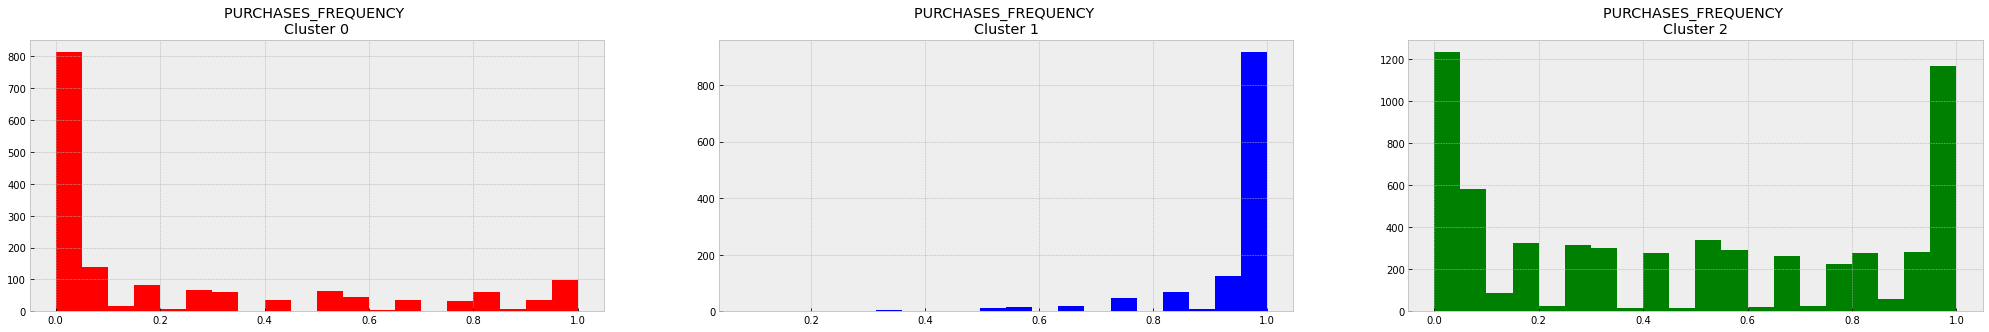

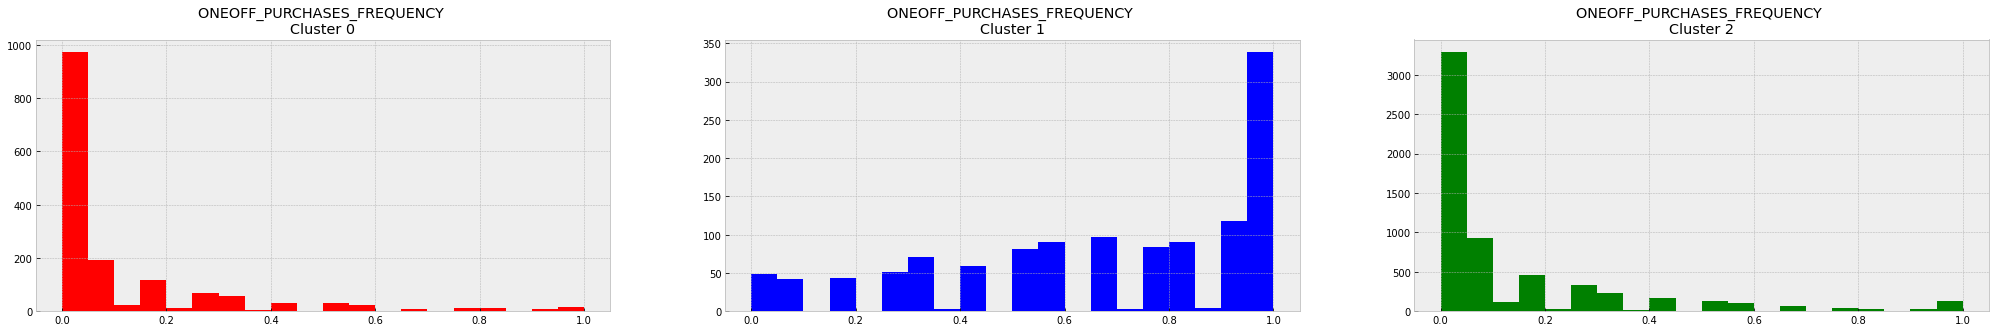

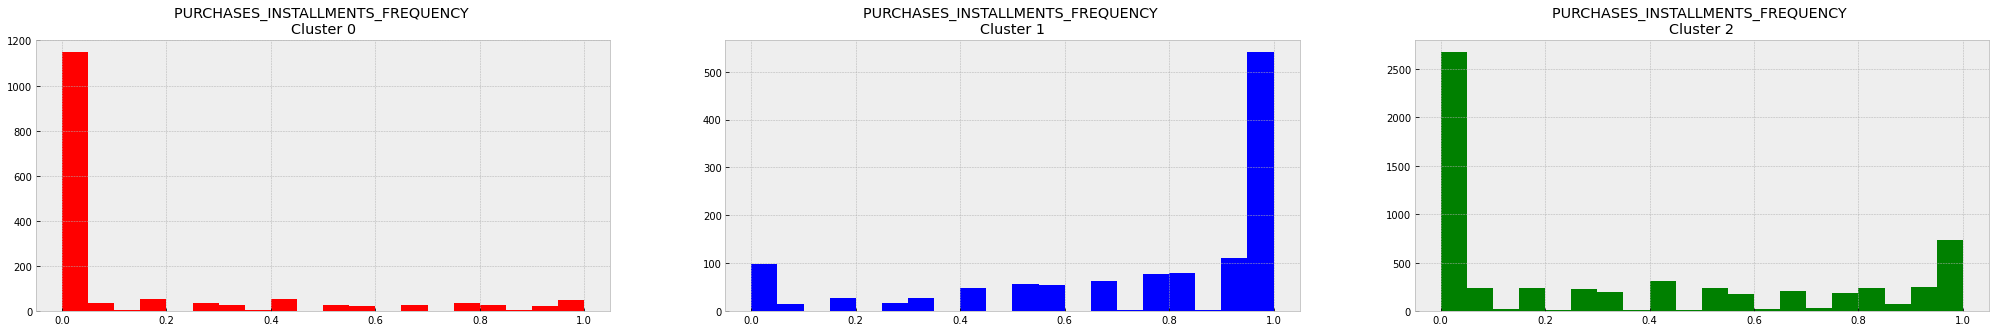

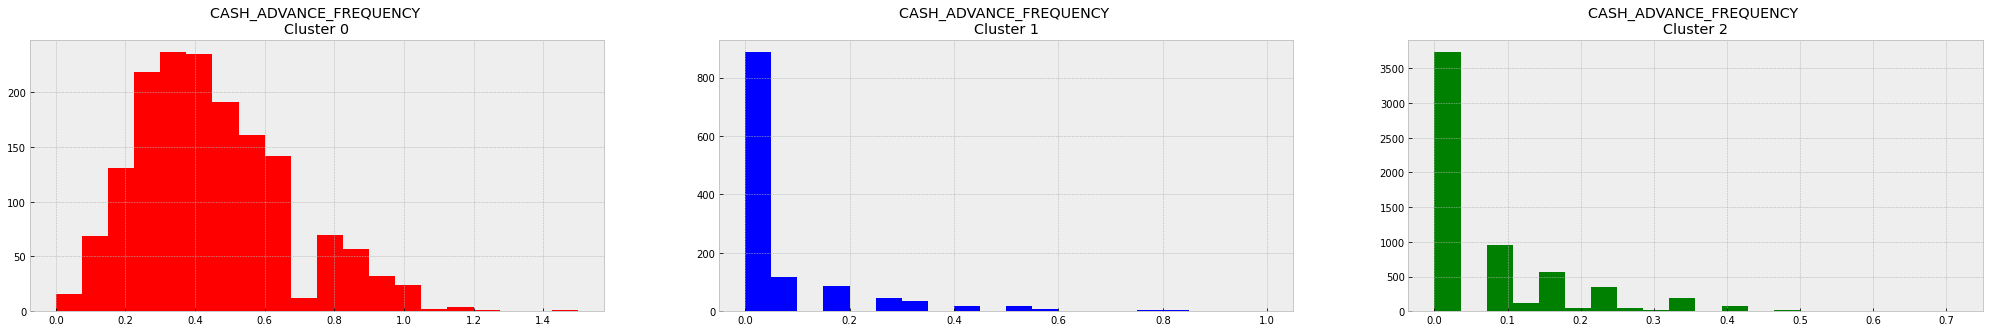

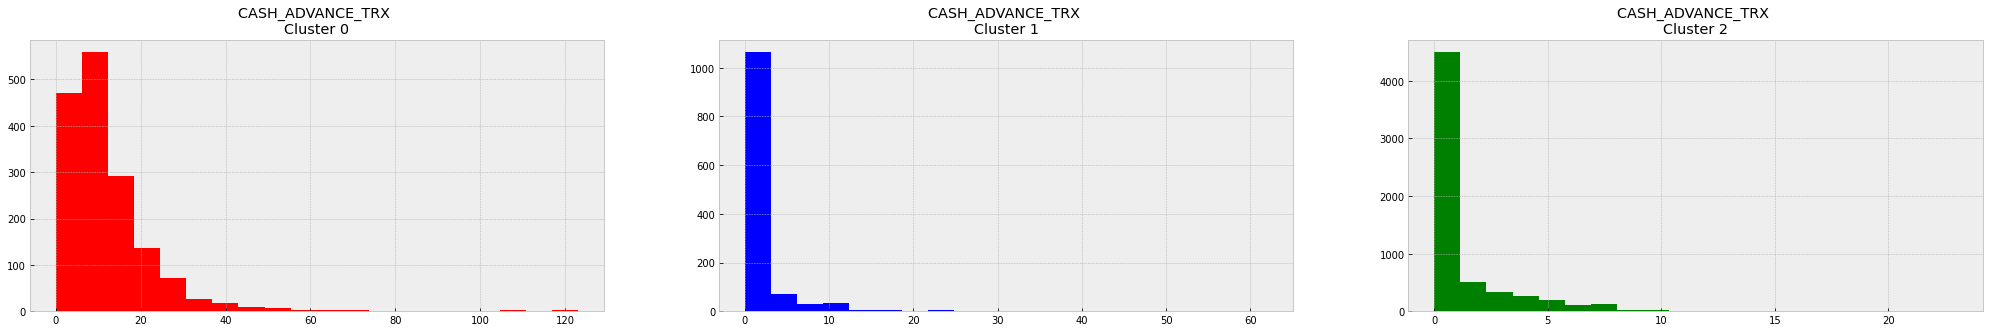

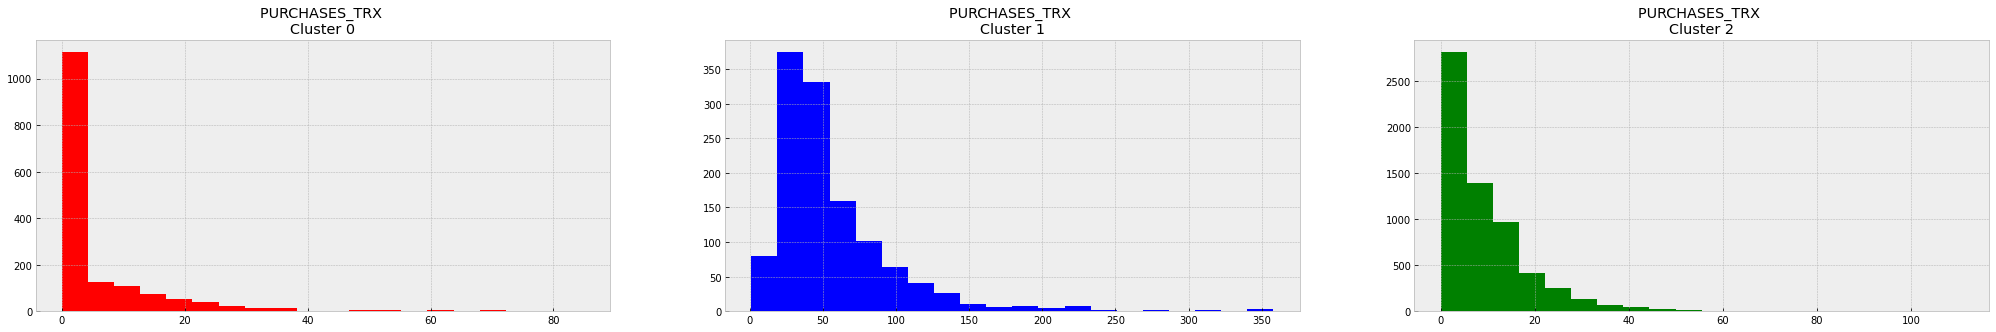

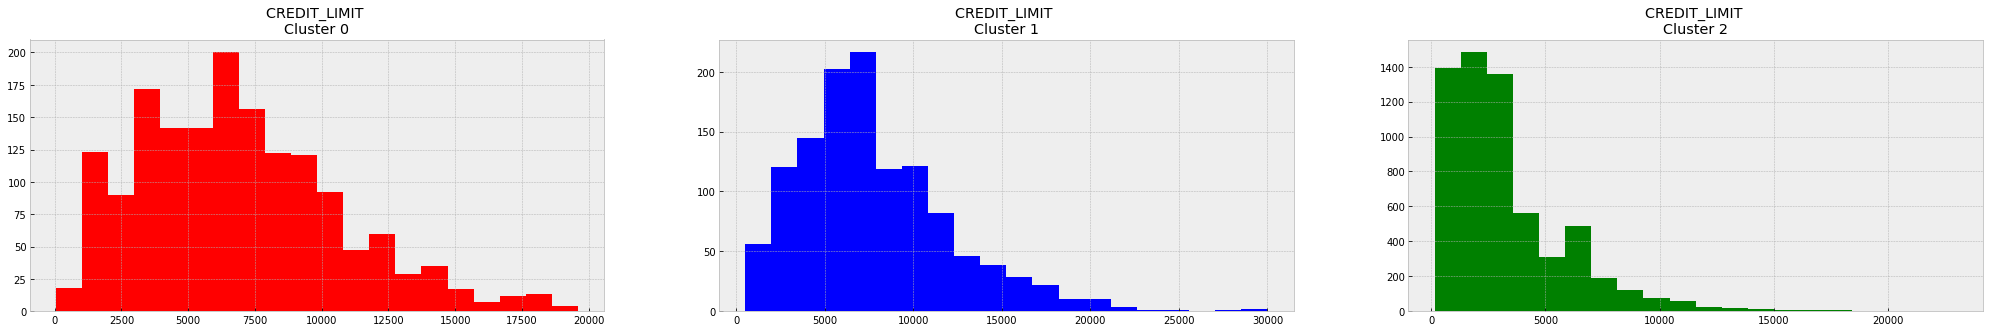

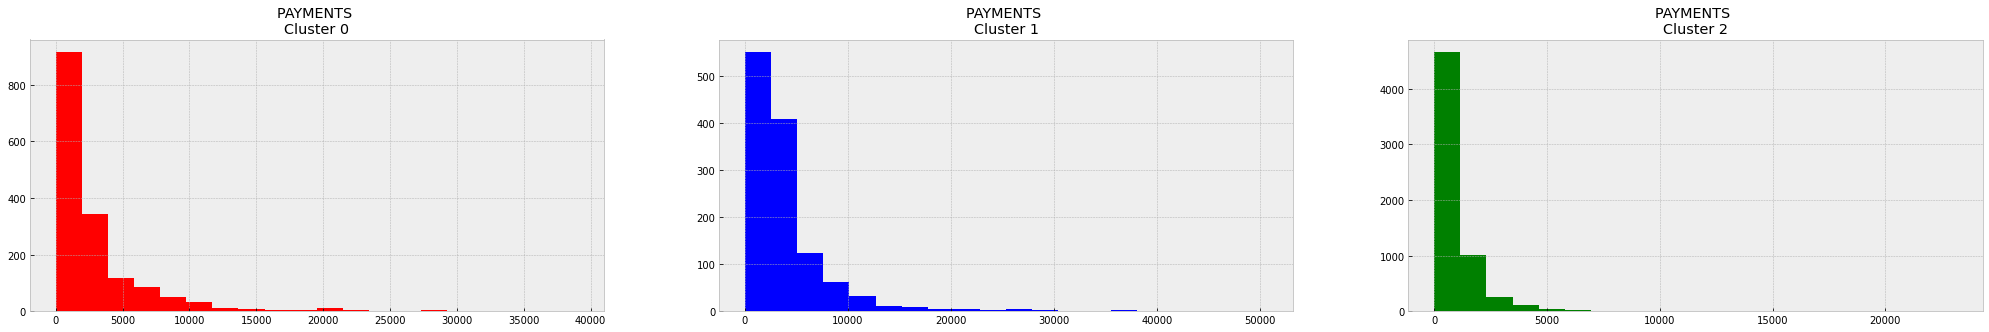

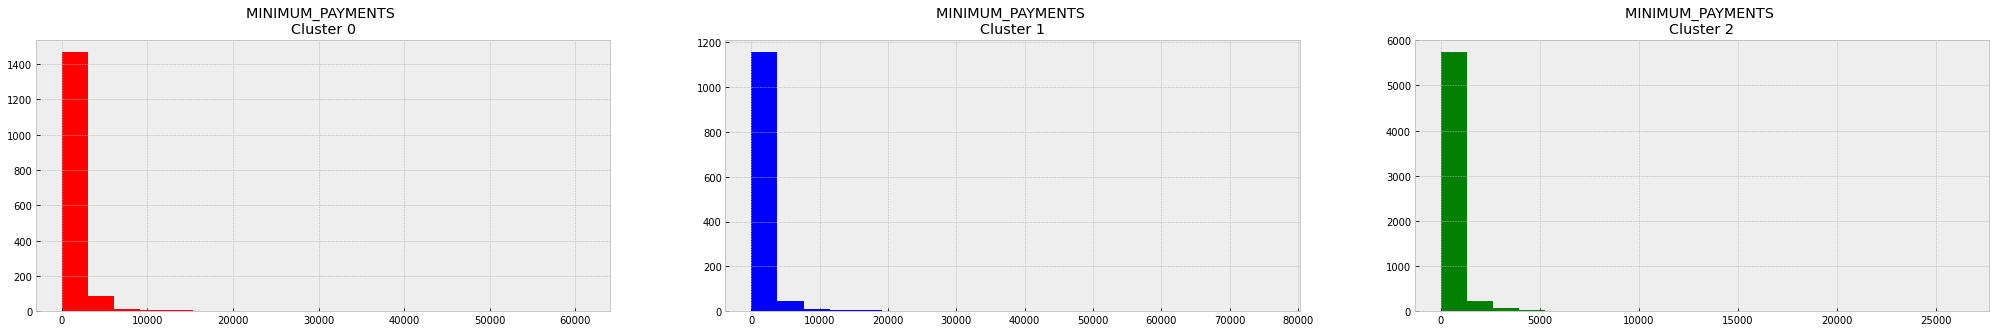

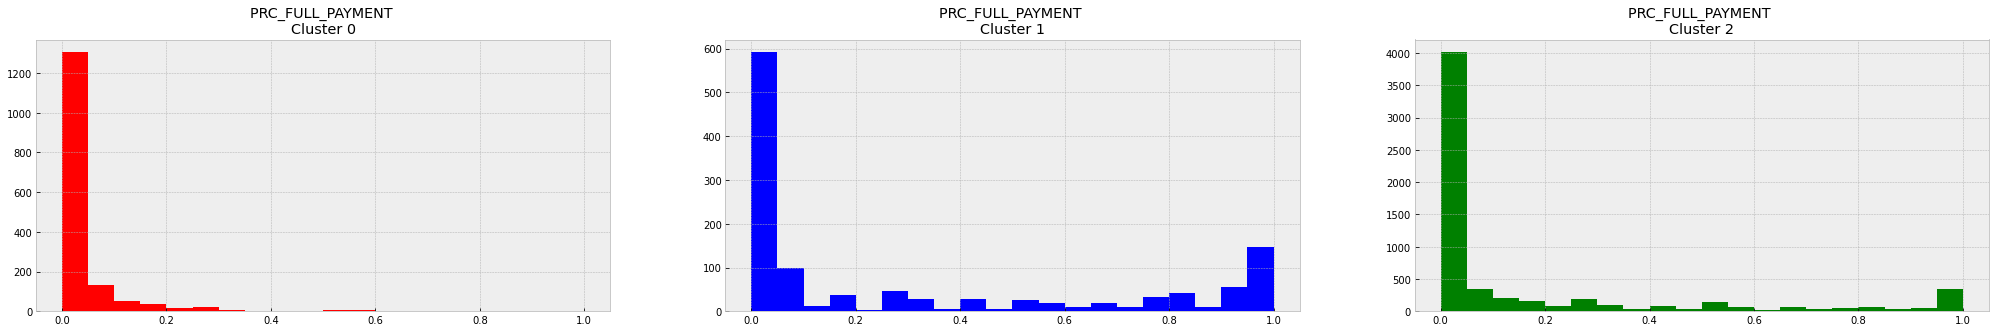

In [73]:
# Vamos plotar alguns gráficos de distribuição de frequeência de cada uma das variáveis, de acordo com o cluster correspondente

color = ['r', 'b', 'g']
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j,c in zip(range(3), color):
    plt.subplot(1, 3, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20, color=c)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [31]:
# Vamos criar um dataframe ordenado por clusters

credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
4474,5256.695330,1.000000,188.60,188.60,0.00,1934.418697,0.083333,0.083333,0.00,0.333333,4,1,9000.0,1421.954639,1452.249653,0.000000,0
3532,5944.084692,1.000000,0.00,0.00,0.00,584.439061,0.000000,0.000000,0.00,0.416667,7,0,6000.0,1523.589544,2416.455868,0.000000,0
3533,909.164049,0.454545,200.00,200.00,0.00,3213.624456,0.083333,0.083333,0.00,0.416667,13,1,4000.0,149.396413,714.634361,0.000000,0
3535,3682.715337,1.000000,0.00,0.00,0.00,789.024025,0.000000,0.000000,0.00,0.416667,16,0,4200.0,980.810810,6604.763658,0.000000,0
3536,3124.579024,1.000000,1620.09,1199.92,420.17,3440.354650,0.833333,0.666667,0.25,0.166667,8,27,3600.0,4563.851228,1920.957300,0.083333,0


In [32]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
3798,19.281564,0.727273,428.90,0.00,428.9,0.000000,0.583333,0.000000,0.416667,0.000000,0,7,10500.0,418.803807,72.655775,0.200000,2
3797,242.161751,1.000000,686.00,686.00,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,5,1600.0,79.554524,142.159120,0.000000,2
3795,483.261458,1.000000,3228.30,3228.30,0.0,0.000000,0.416667,0.416667,0.000000,0.000000,0,34,600.0,3304.347175,476.295378,0.166667,2
3792,692.289800,1.000000,200.00,200.00,0.0,299.710379,0.100000,0.100000,0.000000,0.100000,1,2,9950.0,816.236790,157.889830,0.000000,2
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,2


# Aplicação de PCA (principal component analysis) e visualização dos resultados

In [33]:
# O PCA (Principal Component Analysis) reduz a dimensionalidade do dataframe, perdendo o mínimo de informação possível
# Vamos usa-lo para reduzir o dataframe para duas variáveis, para poder vermos os gráficos dos clusters em duas dimensões

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.71889277, -1.07293952],
       [-1.16930753,  2.50931906],
       [ 0.93841137, -0.38260232],
       ...,
       [-0.59388033, -1.8281157 ],
       [-2.00767123, -0.67376734],
       [-0.21793361, -0.41849075]])

In [34]:
# Criando um dataframe apenas com as duas variáveis principais

pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.718893,-1.072940
1,-1.169308,2.509319
2,0.938411,-0.382602
3,-0.907503,0.045859
4,-1.637830,-0.684975


In [35]:
# Podemos ver que o dataframe reduzido tem apenas duas colunas (dois componentes principais) após a aplicação do PCA
# Mas ainda possui o mesmo número de linhas que o dataset original

pca_df.shape, creditcard_df.shape

((8950, 2), (8950, 16))

In [36]:
# Vamos unir o dataframe PCA com a coluna de cluster, indicando a qual cluster pertence cada registro
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.718893,-1.072940,2
1,-1.169308,2.509319,0
2,0.938411,-0.382602,2
3,-0.907503,0.045859,2
4,-1.637830,-0.684975,2


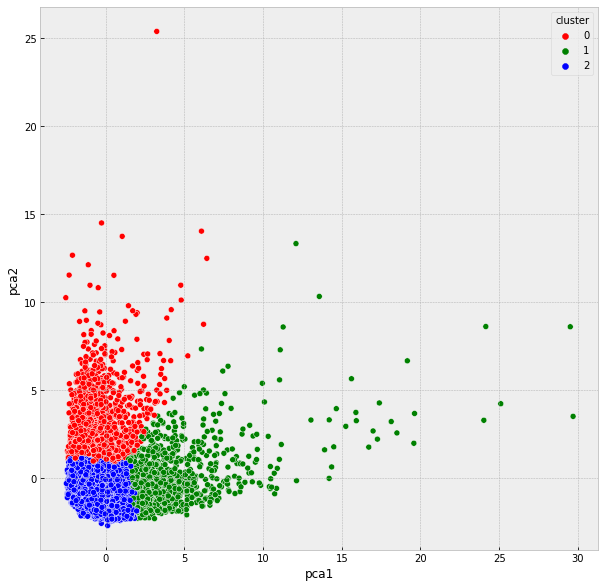

In [37]:
# Agora vamos plotar um gráfico de dispersão para poder visualizar a posição de cada cluster
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue']);

## Aplicação de autoencoders

In [38]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [39]:
creditcard_df_scaled.shape

(8950, 16)

In [40]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 16from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [41]:
input_df = Input(shape=(16,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(16)(x)

In [42]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [43]:
# encoder
encoder = Model(input_df, encoded)

In [44]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [45]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 8s 26ms/step - loss: 0.1959
Epoch 2/50
280/280 [==============================] - 7s 26ms/step - loss: 0.1153
Epoch 3/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0678
Epoch 4/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0448
Epoch 5/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0338
Epoch 6/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0383
Epoch 7/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0420
Epoch 8/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0525
Epoch 9/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0437
Epoch 10/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0321
Epoch 11/50
280/280 [==============================] - 7s 25ms/step - loss: 0.0563
Epoch 12/50
280/280 [==============================] - 7s 24ms/step - loss: 0.0338
Epoch 13/50
2

In [46]:
creditcard_df_scaled.shape

(8950, 16)

In [47]:
compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 6ms/step


In [48]:
compact.shape

(8950, 10)

In [49]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097])

In [50]:
compact[0]

array([0.        , 0.8327842 , 0.35236305, 0.        , 1.0262643 ,
       0.13970874, 0.        , 0.19878493, 0.21467417, 0.32422674],
      dtype=float32)

In [51]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

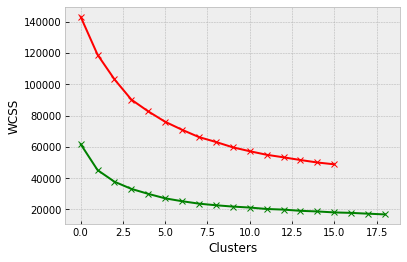

In [52]:
plt.plot(wcss_1, 'bx-', color = 'r', label='Sem Autoencoder')
plt.plot(wcss_2, 'bx-', color = 'g', label='Com Autoencoder')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [53]:
# Vamos analisar os valores do método da silhueta após a aplicação do Autoencoder

no_of_clusters = [3, 4, 5, 6, 7, 8]
  
for n_clusters in no_of_clusters:
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(compact)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(compact, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 3  The average silhouette_score is : 0.45486808
For no of clusters = 4  The average silhouette_score is : 0.33444908
For no of clusters = 5  The average silhouette_score is : 0.33803073
For no of clusters = 6  The average silhouette_score is : 0.35487103
For no of clusters = 7  The average silhouette_score is : 0.34450895
For no of clusters = 8  The average silhouette_score is : 0.3296018


In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(compact)

KMeans(n_clusters=3)

In [55]:
labels = kmeans.labels_
labels, labels.shape

(array([0, 0, 0, ..., 0, 0, 0], dtype=int32), (8950,))

In [56]:
df_cluster_auto = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_auto.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,0


In [57]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_auto_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_auto_df.head()

,pca1,pca2
0,-1.269393,0.068479
1,0.304617,-1.252579
2,-0.942871,0.398913
3,0.400204,-0.213233
4,-1.403707,0.018729


In [58]:
pca_auto_df = pd.concat([pca_auto_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_auto_df.head()

,pca1,pca2,cluster
0,-1.269393,0.068479,0
1,0.304617,-1.252579,0
2,-0.942871,0.398913,0
3,0.400204,-0.213233,0
4,-1.403707,0.018729,0


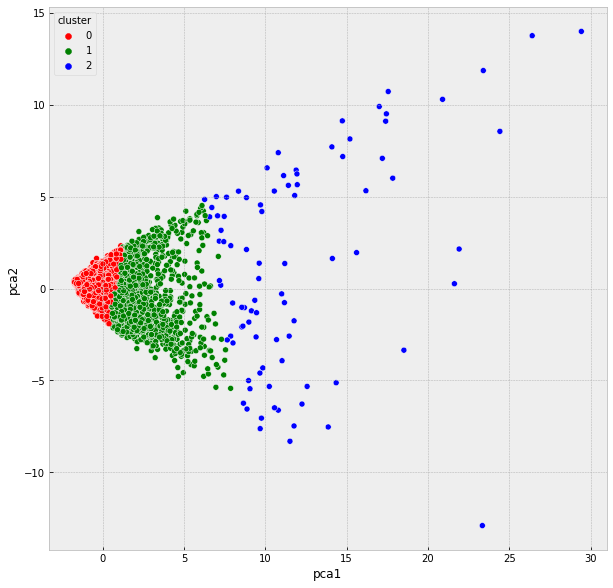

In [59]:
# Agora que aplicamos o PCA, já podemos ver o gráfico de dispersão após a aplicação do AutoEncoder

plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_auto_df, palette = ['red', 'green', 'blue']);

In [60]:
df_cluster_ordered = df_cluster_auto.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
5804,396.890847,1.000000,3943.97,3159.53,784.44,0.000000,1.000000,1.0,1.000000,0.000000,0,43,7500.0,3578.144430,179.793545,0.583333,0
5803,2882.431664,1.000000,0.00,0.00,0.00,130.714887,0.000000,0.0,0.000000,0.166667,2,0,3000.0,608.839527,1240.347359,0.000000,0
5802,1459.534846,1.000000,0.00,0.00,0.00,1275.554446,0.000000,0.0,0.000000,0.250000,6,0,5500.0,827.318305,334.942449,0.000000,0
5801,1101.328772,0.727273,0.00,0.00,0.00,3061.014837,0.000000,0.0,0.000000,0.333333,12,0,3000.0,649.339928,432.288614,0.000000,0


In [61]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
645,1482.235539,1.000000,14604.87,2475.93,12128.94,0.000000,1.000000,0.583333,1.000000,0.000000,0,219,15500.0,14462.630560,340.717801,1.000000,2
1991,1513.075264,1.000000,15704.04,12618.86,3085.18,0.000000,1.000000,0.916667,0.916667,0.000000,0,185,3000.0,14399.703180,310.712671,0.916667,2
2915,268.577278,0.181818,0.00,0.00,0.00,5625.798427,0.000000,0.000000,0.000000,0.083333,1,0,9000.0,34107.074990,761.962503,1.000000,2
5287,7268.706380,1.000000,306.91,306.91,0.00,12702.427700,0.272727,0.272727,0.000000,1.000000,93,4,12000.0,3512.633784,2096.962594,0.000000,2
501,13479.288210,1.000000,41050.40,40624.06,426.34,0.000000,0.833333,0.666667,0.416667,0.000000,0,157,17000.0,36066.750680,15914.484620,0.083333,2


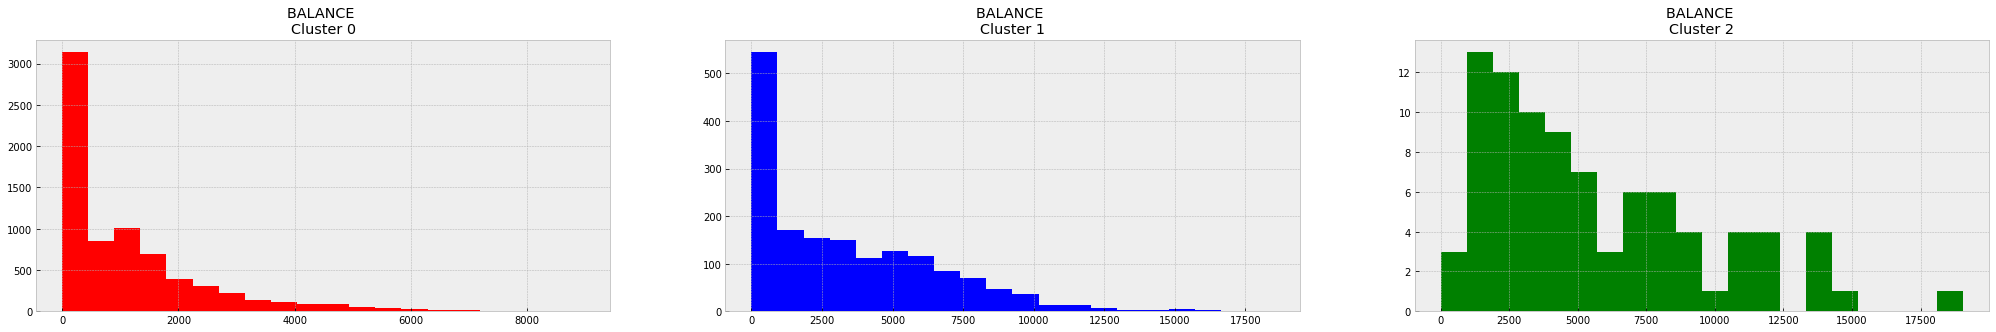

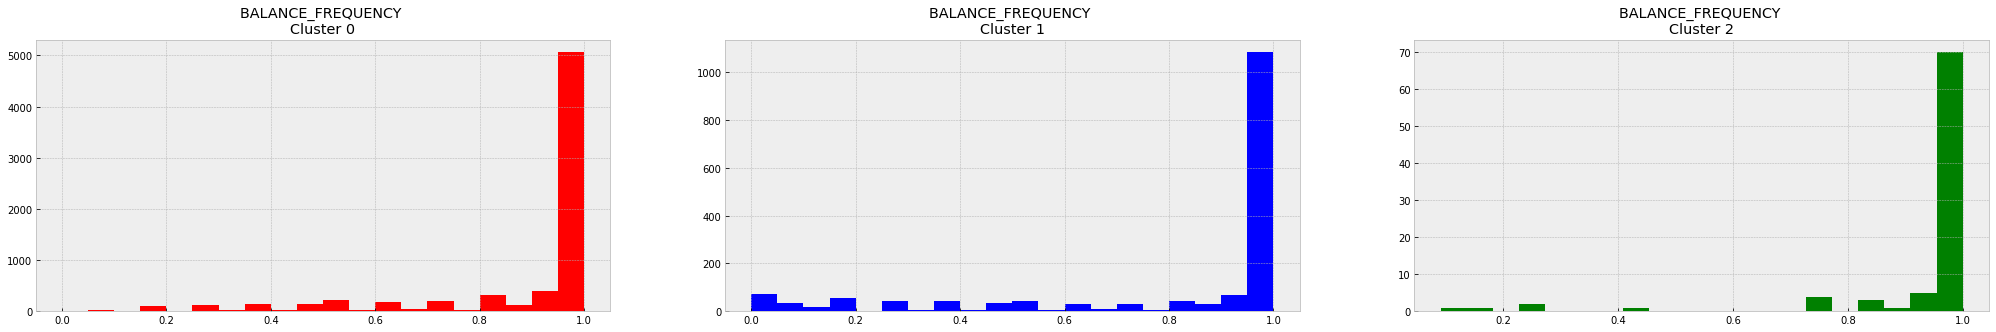

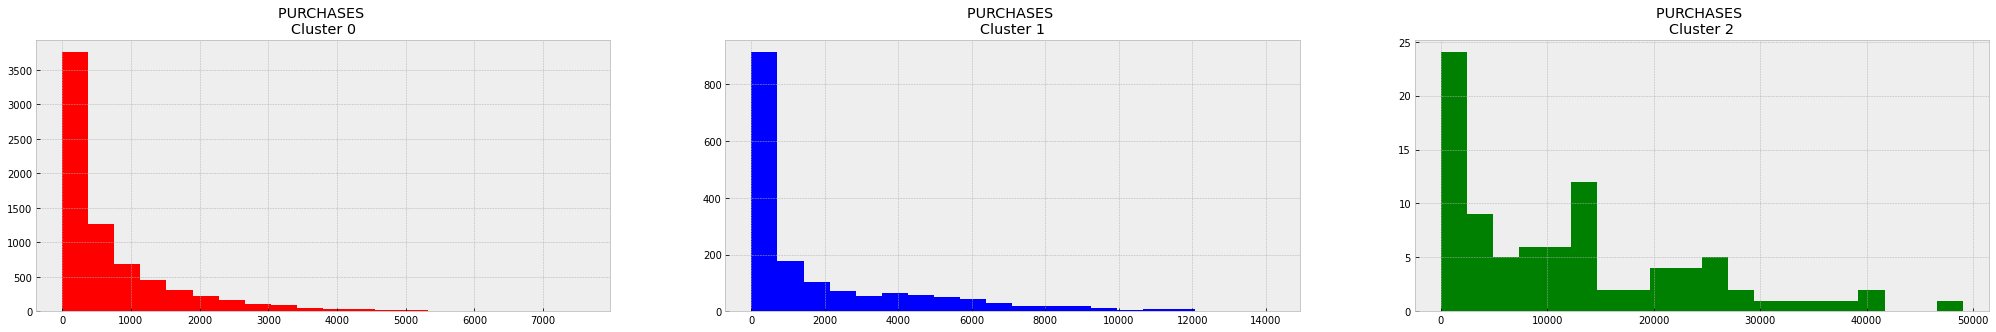

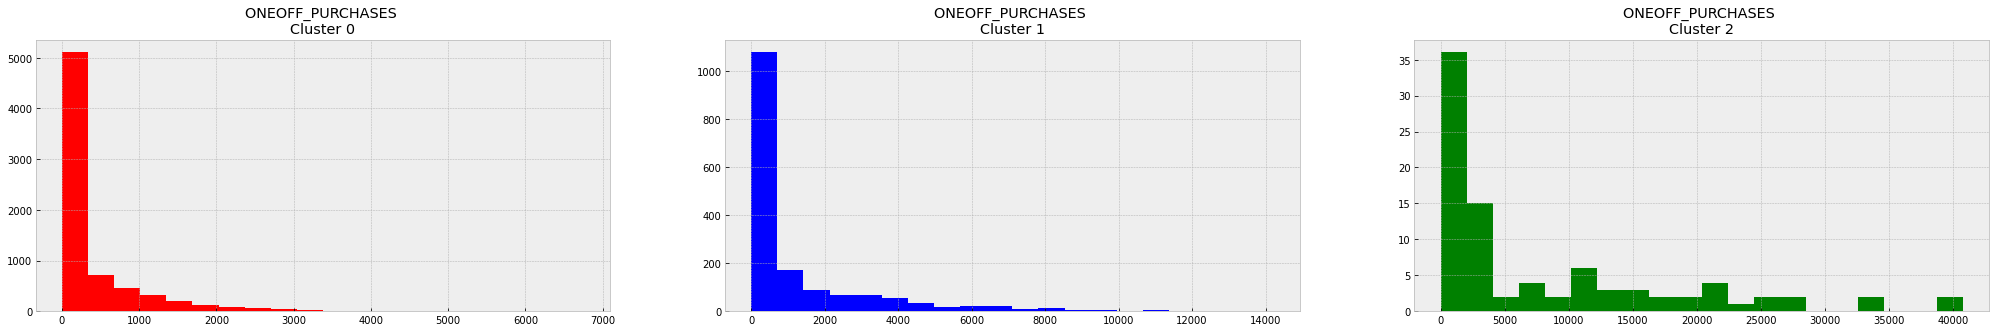

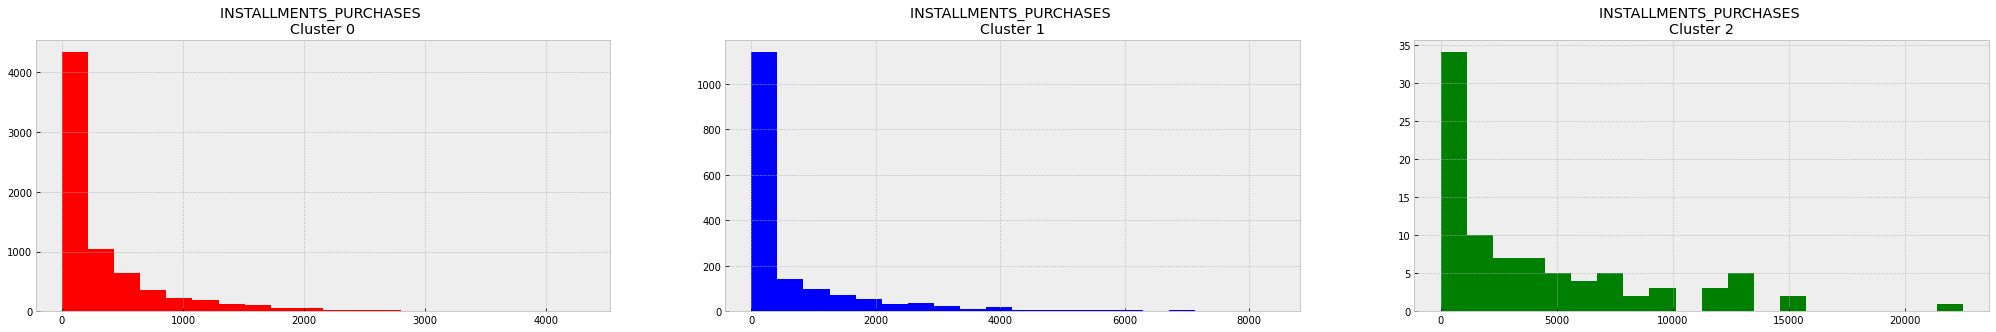

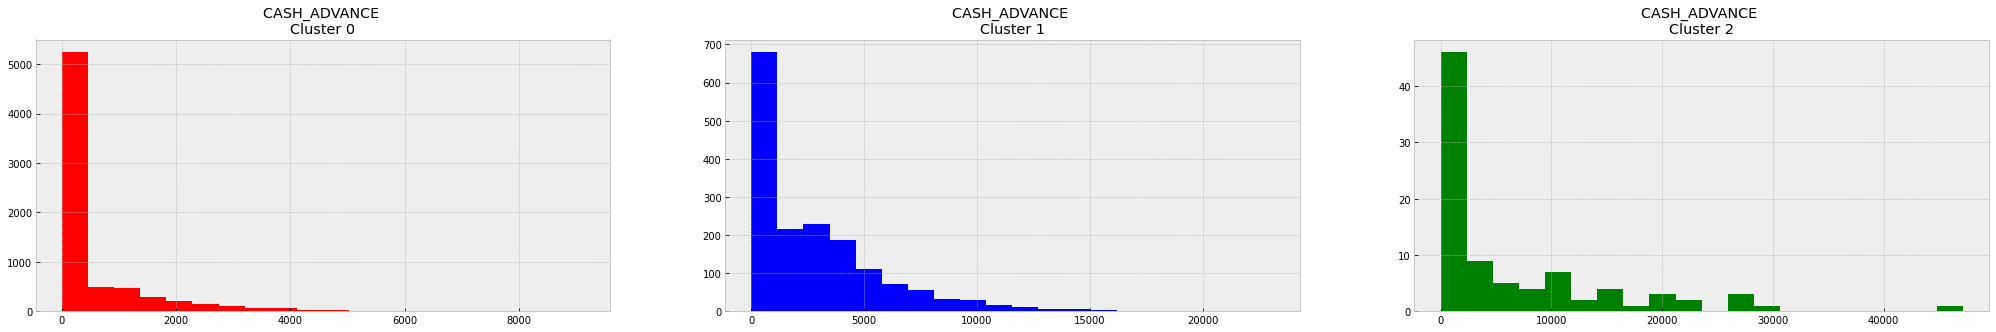

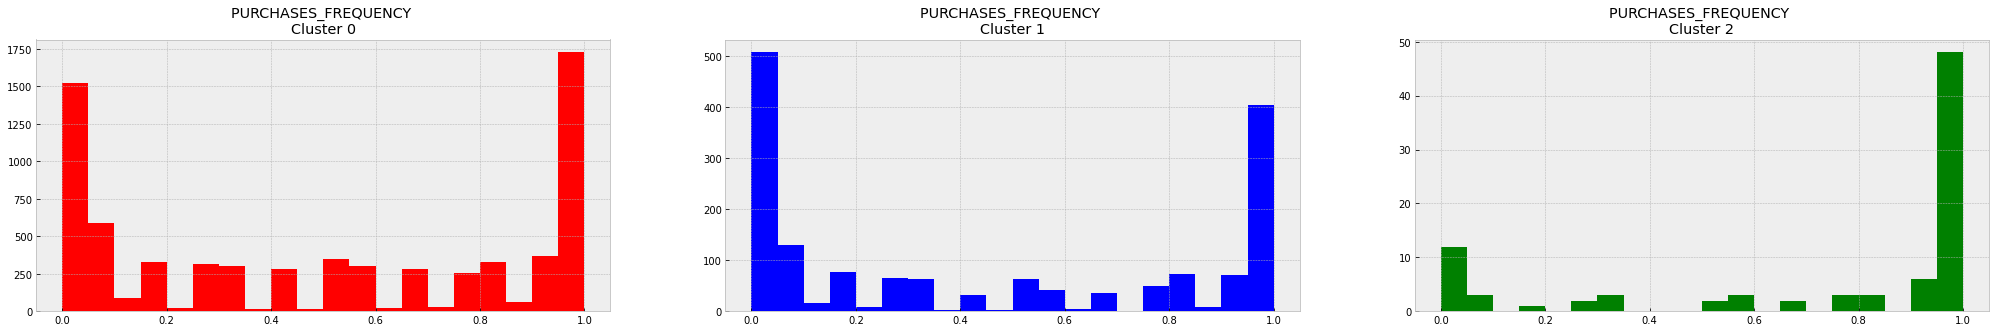

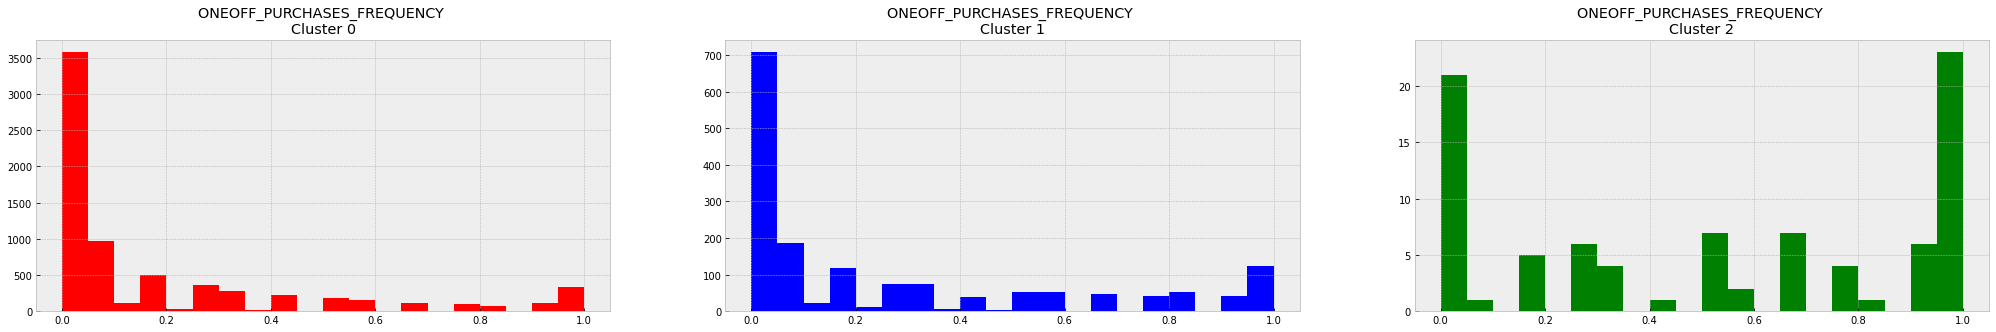

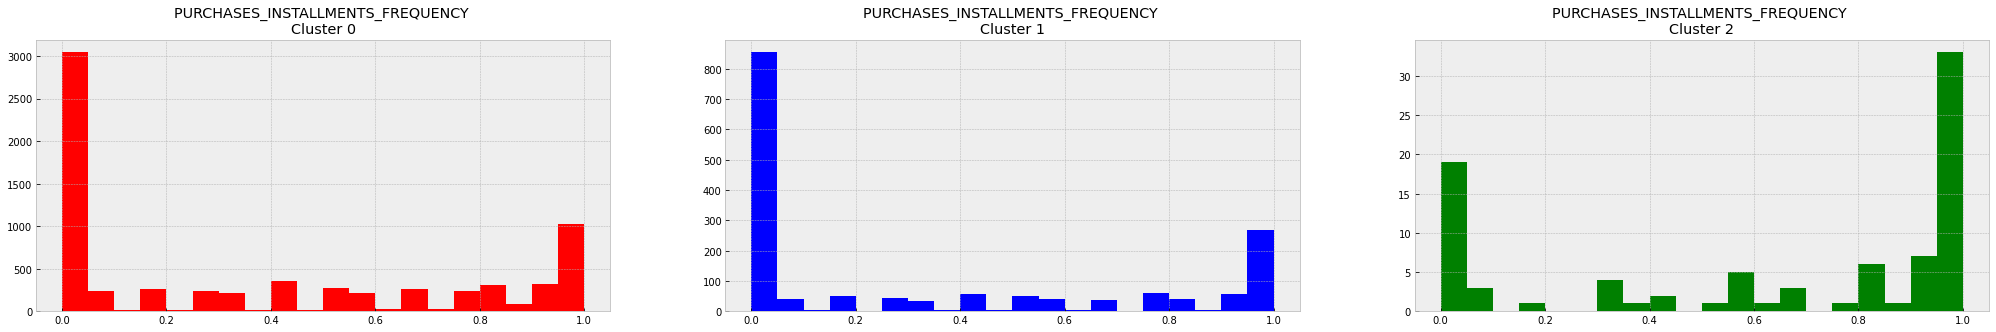

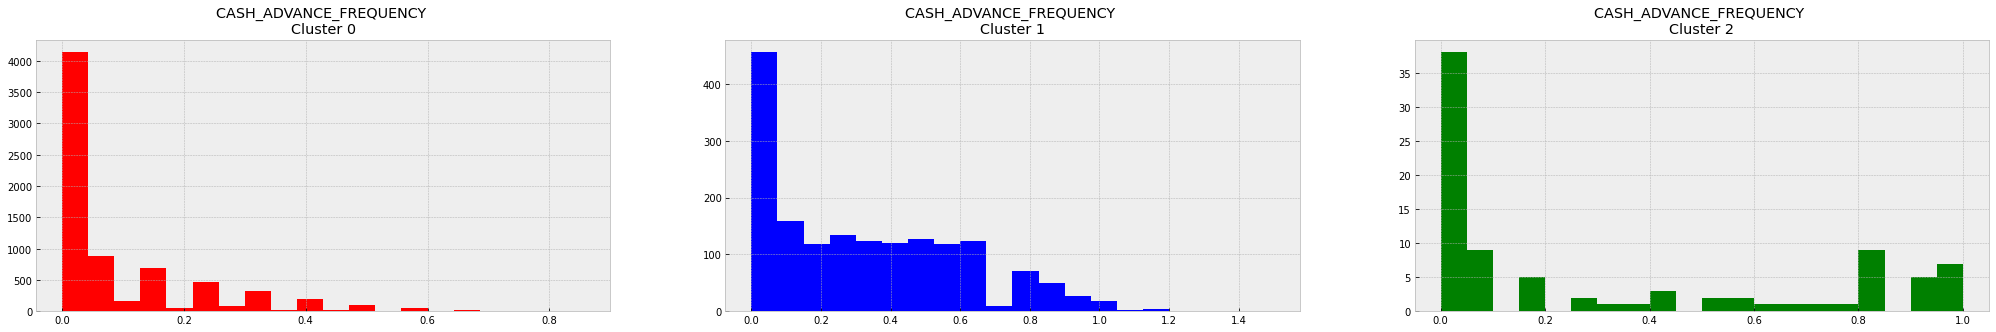

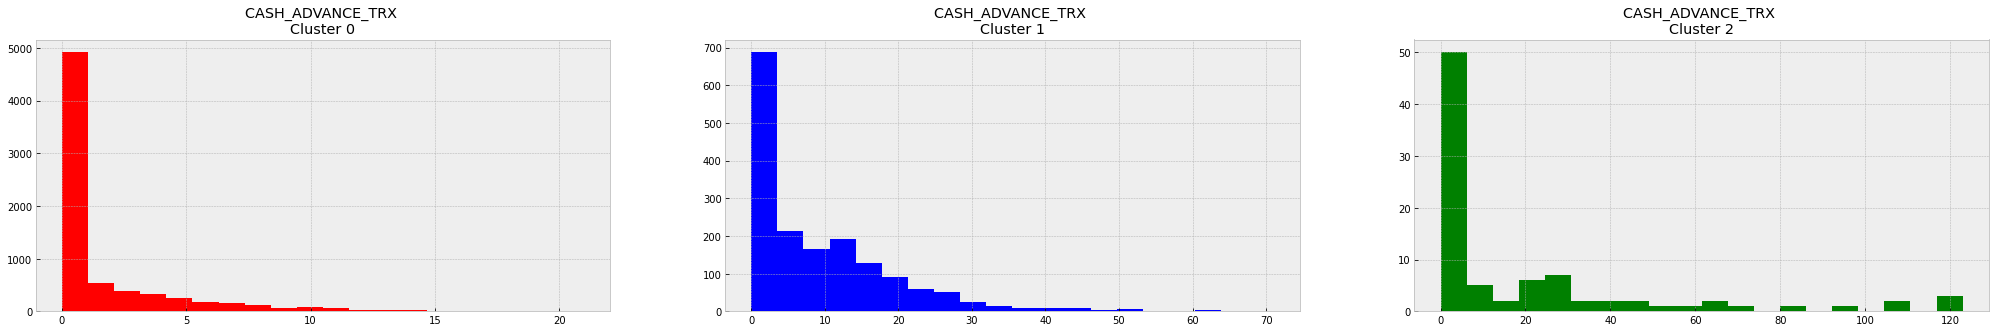

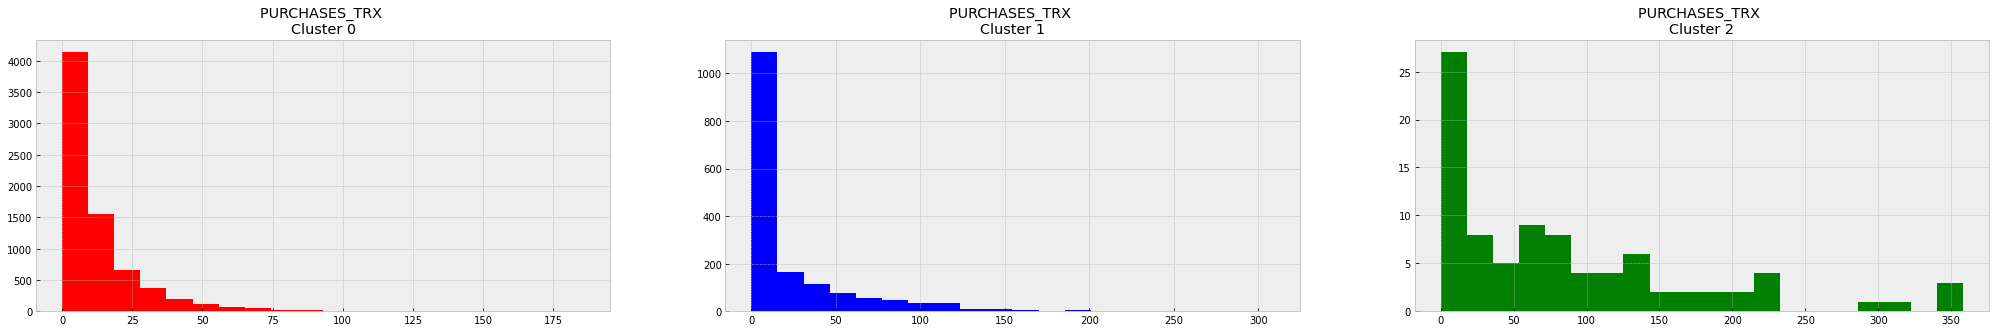

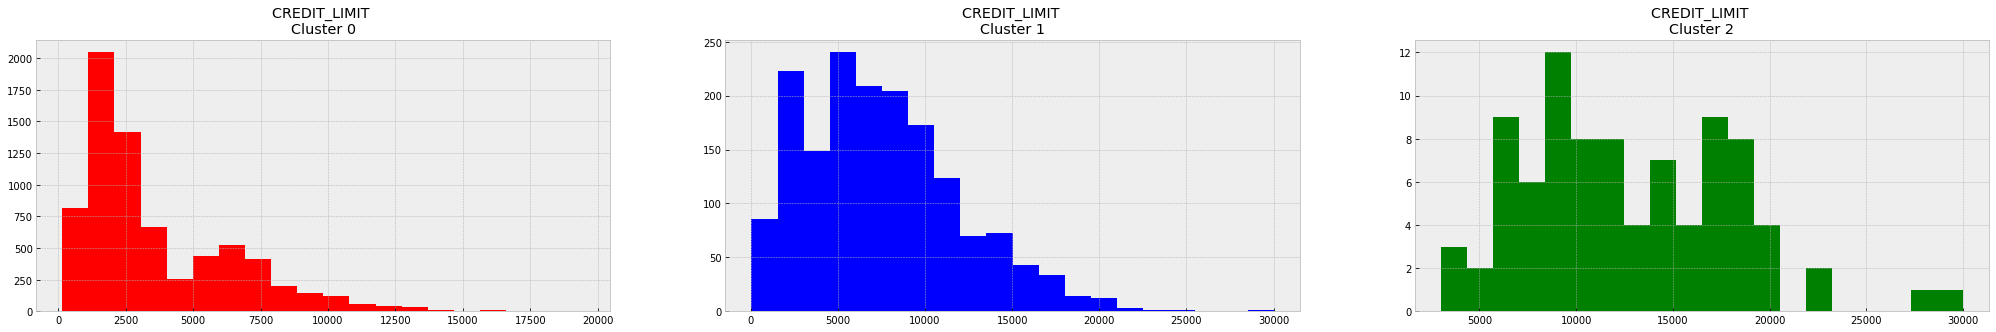

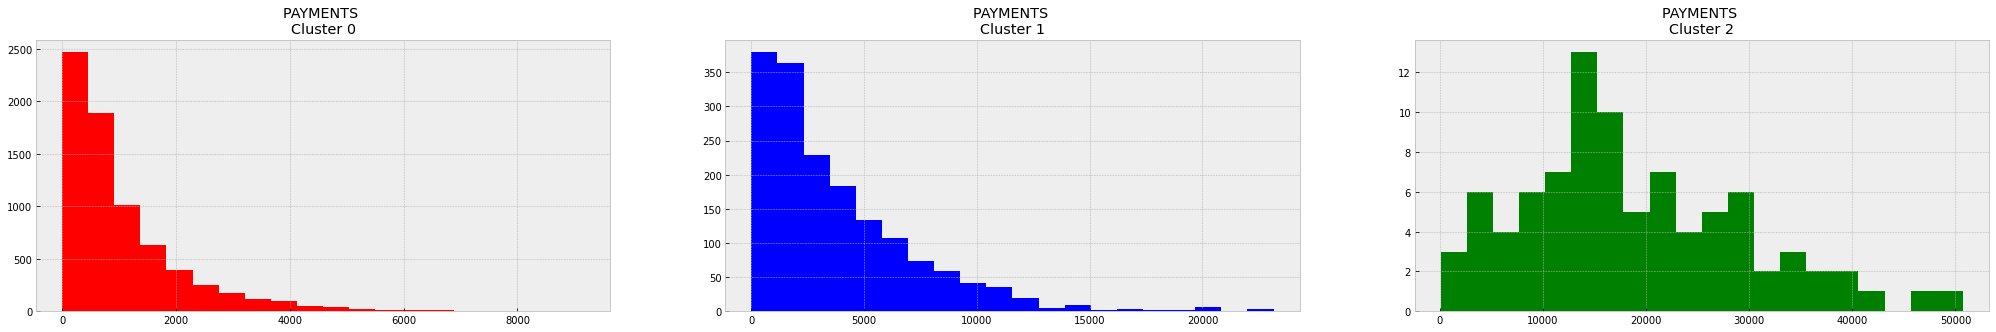

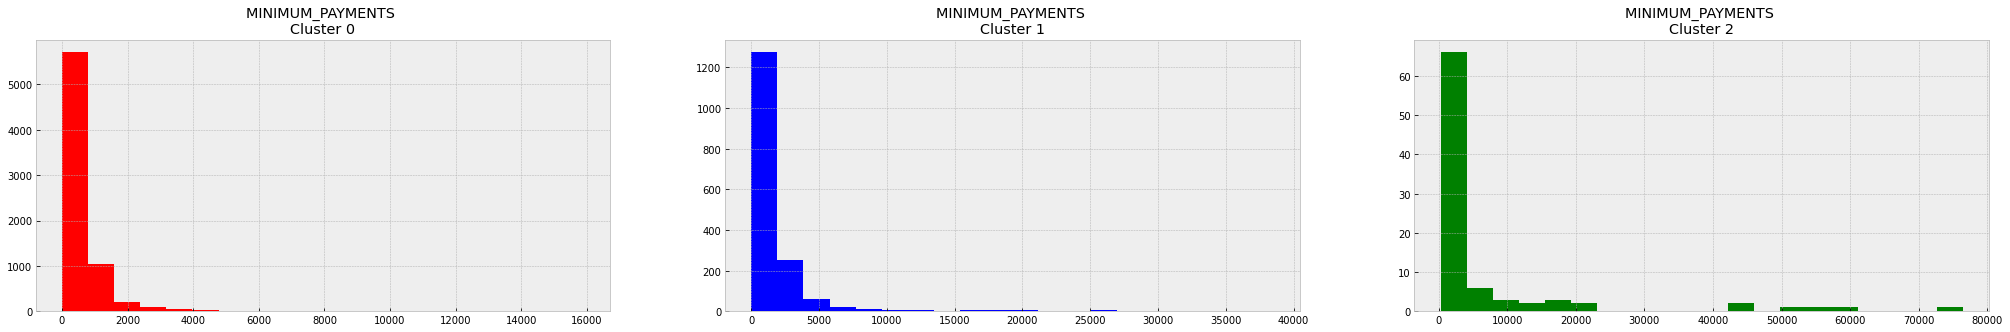

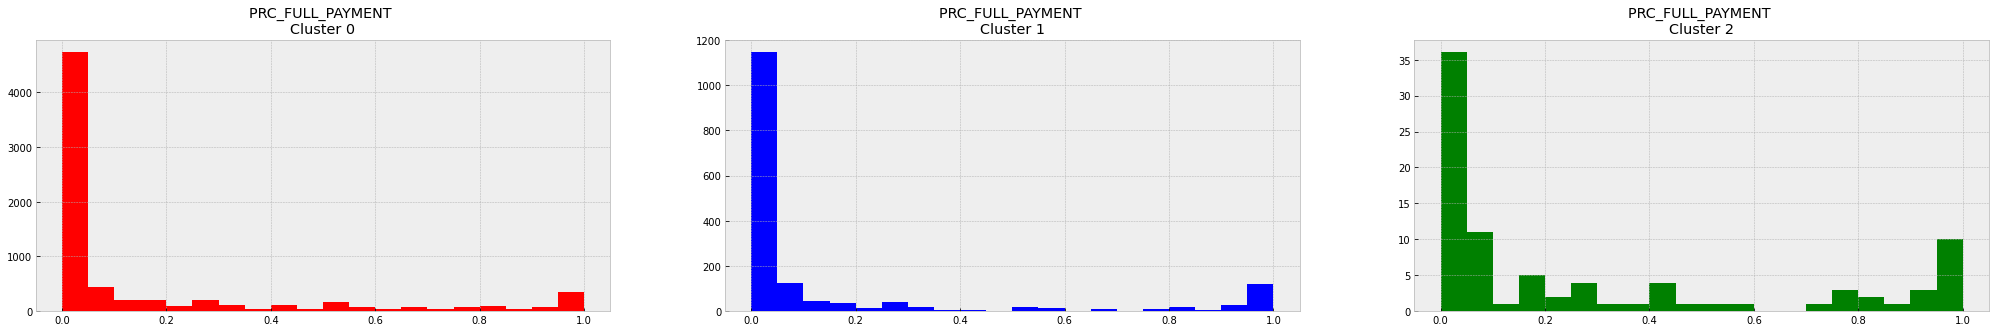

In [75]:
color = ['r', 'b', 'g']
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j,c in zip(range(3), color):
    plt.subplot(1, 3, j + 1)
    cluster = df_cluster_auto[df_cluster_auto['cluster'] == j]
    cluster[i].hist(bins = 20, color=c)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [64]:
variaveis = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT', 'PAYMENTS']

In [65]:
df_cluster_0 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==0]
df_cluster_1 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==1]
df_cluster_2 = df_cluster_ordered.loc[df_cluster_ordered['cluster']==2]

In [66]:
df_cluster_0[variaveis].mean()

BALANCE             1111.273602
PURCHASES            693.187487
CASH_ADVANCE         511.671439
PRC_FULL_PAYMENT       0.153816
CREDIT_LIMIT        3640.380948
PAYMENTS            1057.555659
dtype: float64

In [67]:
df_medias = pd.DataFrame({'Cluster_0': df_cluster_0[variaveis].mean().values, 
                          'Cluster_1': df_cluster_1[variaveis].mean().values,
                          'Cluster_2': df_cluster_2[variaveis].mean().values}, 
                         index = df_cluster_0[variaveis].mean().index)

In [68]:
df_medias

,Cluster_0,Cluster_1,Cluster_2
BALANCE,1111.273602,3317.824055,5580.332901
PURCHASES,693.187487,1768.070602,11947.156591
CASH_ADVANCE,511.671439,2736.133357,6066.561151
PRC_FULL_PAYMENT,0.153816,0.146077,0.289500
CREDIT_LIMIT,3640.380948,7770.842768,12587.500000
PAYMENTS,1057.555659,3767.083568,18656.396579


# CONCLUSÕES

- Os valores apresentados, são uma média dos valores das respectivas variáveis, em cada cluster, por exemplo, os clientes do cluster 2, em média, possuem um limite de crédito de U$ 5226.35.

- Esse é o momento de deduzir conclusões mais aprofundadas. Essas deduções são subjetivas e irão depender muito do objetivo da empresa, mas vamos aqui fazer algumas análises que possam ser de grande valor:

- **Cluster 0**: Clientes com limite de crédito médio; Fazem compras com baixos valores; Não pagam em dia.

- **Cluster 1**: Clientes com limite de crédito baixo; Fazem compras com baixos valores; Não pagam em dia.

- **Cluster 2**: Clientes com limite de crédito alto; Fazem compras com grandes valores; Pagam em dia.



**Com essas deduções baseadas nos clusters, podemos pensar em estratégias como**:

- Já que os clientes do cluster 2 fazem compras com grandes valores e pagam em dia, não seria interessante aumentar o limite de crédito desses clientes para que eles possam gastar mais e gerar mais lucro para a empresa?

- Já que os clientes do cluster 1 possuem um alto limite de crédito, porém fazem compras com pequenos valores, não seria interessante, por exemplo, fazer uma parceria com alguma empresa que fornece pontos por gastos em cartões de crédito para fazer com que esses clientes gastem mais?

- Já que os clientes do cluster 0 não pagam em dia e possuem um limite de crédito razoável, não seria interessante diminuir esse limite para que a empresa não sofra com prejuízos maiores?

Enfim, essas são algumas das deduções que conseguimos fazer, mas, como sabemos, tudo isso é bem subjetivo e depende do que a empresa quer no momento e se a estratégia x, y ou z faz sentido nesse momento. Não necessariamente existe um certo ou errado nessas análises, isso depende do objetivo final.


Estudo do problema para fazer uma clusterização;

Aquisição dos dados;
Análise exploratória dos dados;
Preparação e limpeza dos dados;
Modelo base de machine learning;
Testes de hipóteses modificando diversas variáveis no modelo de machine learning;
Escolha do modelo final;
Conclusão do objetivo e definição do plano de ação.